# PyEarthScience:  Python examples for Earth Scientists

## vector plots

### Using PyNGL

#### vector plot with
   - vectors on map plot
   - rectilinear grid (lat/lon)

In [1]:
import Ngl,Nio

In [2]:
#--  define variables
diri   = "/Users/k204045/NCL/general/data/new_data/" #-- data directory
fname  = "rectilinear_grid_2D.nc"           #-- data file name

minval =  250.                              #-- minimum contour level
maxval =  315                               #-- maximum contour level
inc    =    5.                              #-- contour level spacing

#--  open file and read variables
f      = Nio.open_file(diri + fname,"r")    #-- open data file
temp   = f.variables["tsurf"][0,::-1,:]     #-- first time step, reverse latitude
u      = f.variables["u10"][0,::-1,:]       #-- first time step, reverse latitude
v      = f.variables["v10"][0,::-1,:]       #-- first time step, reverse latitude
lat    = f.variables["lat"][::-1]           #-- reverse latitudes
lon    = f.variables["lon"][:]              #-- all longitudes

nlon   = len(lon)                           #-- number of longitudes
nlat   = len(lat)                           #-- number of latitudes

Open a workstation, here x11 window.

In [3]:
#-- open a workstation
wkres           =  Ngl.Resources()          #-- generate an resources object for workstation
wks_type        = "png"                     #-- graphics output type
wks             =  Ngl.open_wks(wks_type,"plot_vector_PyNGL",wkres)

Set resources.

In [4]:
#-- create 1st plot: vectors on global map
res                           =  Ngl.Resources()
res.vfXCStartV                =  float(lon[0])                #-- minimum longitude
res.vfXCEndV                  =  float(lon[len(lon[:])-1])    #-- maximum longitude
res.vfYCStartV                =  float(lat[0])                #-- minimum latitude
res.vfYCEndV                  =  float(lat[len(lat[:])-1])    #-- maximum latitude

res.tiMainString              = "~F25~Wind velocity vectors"  #-- title string
res.tiMainFontHeightF         =  0.024                        #-- decrease title font size

res.mpLimitMode               = "Corners"                     #-- select a sub-region
res.mpLeftCornerLonF          =  float(lon[0])                #-- left longitude value
res.mpRightCornerLonF         =  float(lon[len(lon[:])-1])    #-- right longitude value
res.mpLeftCornerLatF          =  float(lat[0])                #-- left latitude value
res.mpRightCornerLatF         =  float(lat[len(lat[:])-1])    #-- right latitude value
res.mpGridSpacingF            =  30                           #-- map grid spacing

res.mpPerimOn                 =  True                         #-- turn on map perimeter

res.vpXF                      =  0.1                          #-- viewport x-position
res.vpYF                      =  0.92                         #-- viewport y-position
res.vpWidthF                  =  0.75                         #-- viewport width
res.vpHeightF                 =  0.75                         #-- viewport height

res.vcMinFracLengthF          =   0.15                        #-- increase length of vectors
res.vcMinMagnitudeF           =   0.0007                      #-- increase length of vectors
res.vcRefLengthF              =   0.025                       #-- set reference vector length
res.vcRefMagnitudeF           =  20.0                         #-- set reference magnitude value
res.vcLineArrowThicknessF     =   1.0                         #-- make vector lines thicker (default: 1.0)

Draw the vector plot.

In [5]:
map1 = Ngl.vector_map(wks,u[::2,::2],v[::2,::2],res)          #-- draw a vector plot

#-- the end
Ngl.delete_wks(wks)                            #-- this need to be done to close the graphics output file
Ngl.end()

Show the plot in this notebook.

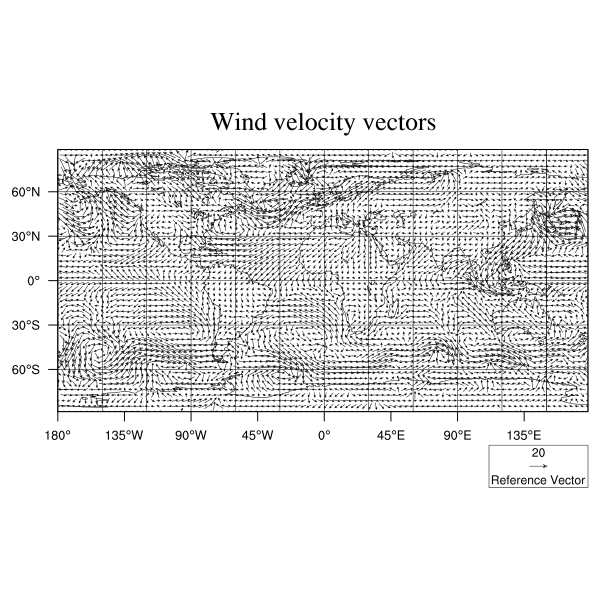

In [6]:
from IPython.display import Image
Image(filename='plot_vector_PyNGL.png') 